In [1]:
%load_ext lab_black
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

9


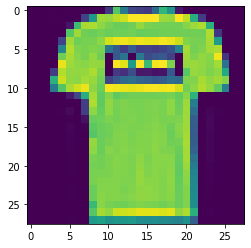

In [3]:
plt.imshow(train_images[1])
print(train_labels[0])

In [4]:
train_images = train_images / 255
test_images = test_images / 255

In [5]:
# defining layers
l0 = keras.layers.Flatten()
l1 = keras.layers.Dense(512, activation=tf.nn.relu)

lf = keras.layers.Dense(10, activation=tf.nn.softmax)

In [6]:
# defining model
model = tf.keras.Sequential([l0, l1, l1, l1, lf])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), loss="sparse_categorical_crossentropy"
)

In [7]:
# training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2246
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0798
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1864
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2065
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1896
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2226
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1919
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1829
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1919
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1656


In [8]:
# evaluating model
model.evaluate(
    test_images,
    test_labels,
)

313/313 [==============================] - 1s 1ms/step - loss: 2.1955


2.195469379425049

### Call Backs:
CallBacks allow us to control the training of the model and not have to wait for all the epochs to be over.

Controlling factor can fe fetched from **logs.get()**.

In [11]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        """
        will chech the loss at the end of the epochs, if it is below a threshold. STOP
        """
        if logs.get("loss") < 2.5:
            print("stopping training process")
            self.model.stop_training = True

In [12]:
callbacks = MyCallback()
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
train_images = train_images / 255
test_images = test_images / 255

# defining layers
l0 = keras.layers.Flatten()
l1 = keras.layers.Dense(512, activation=tf.nn.relu)
lf = keras.layers.Dense(10, activation=tf.nn.softmax)

# defining model
model = tf.keras.Sequential([l0, l1, l1, l1, lf])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), loss="sparse_categorical_crossentropy"
)
# training
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks], workers=8)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4681
stopping training process
